#**Walmart Casestudy**

**About Walmart:**

Walmart, founded in 1962 by Sam Walton, is a retail giant and one of the world's largest and most influential companies. Headquartered in Bentonville, Arkansas, this American multinational corporation has established itself as a global powerhouse in the retail industry. Walmart operates a vast network of hypermarkets, discount department stores, and grocery stores under various brand names across the United States and in numerous countries around the world.


**Business Problem:**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#loading the data
df=pd.read_csv('walmart_data.csv')

In [ ]:
df_copy=df.copy()

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [ ]:
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


###**Insights:**
- From the above analysis, it is clear that, data has total of 10 features with lots of mixed alpha numeric data.
- Apart from Purchase Column, all the other data types are of categorical type. We will change the datatypes of all such columns to category

In [ ]:
#Changing the data type of the columns
for i in df.columns[:-1]:
  df[i]=df[i].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


##**Statistical Summary:**

In [ ]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


###**Insights:**
- The purchase amount is varing from min value of 12 to 23961.
- Median value is 8047 and is lower than the mean value  9263 indicating the right skewed distribution.

In [ ]:
df.describe(include='category')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


###**Insights:**

**User_ID** - Among `5,50,068` transactions there are `5891` unique user_id, indicating same customers buying multiple products.

**Product_ID** - Among `5,50,068` transactions there are `3631` unique products,with the product having the code `P00265242` being the `highest seller`, with a maximum of `1,880 units` sold.

**Gender** - Out of `5,50,068` transactions, 4,14,259 `(nearly 75%)` were done by male gender indicating a significant disparity in purchase behavior between males and females during the Black Friday event.

**Age** - We have `7` unique age groups in the dataset. `26 - 35` Age group has maximum of `2,19,587` transactions. We will analyse this feature in detail in future

**Stay_In_Current_City_Years** - Customers with `1` year of stay in current city accounted to maximum of `1,93,821` transactions among all the other customers with (0,2,3,4+) years of stay in current city

**Marital_Status** - `59%` of the total transactions were done by `Unmarried Customers` and `41%` by `Married Customers`.

In [ ]:
#cheking the unique values
df['User_ID'].unique()

[1000001, 1000002, 1000003, 1000004, 1000005, ..., 1004588, 1004871, 1004113, 1005391, 1001529]
Length: 5891
Categories (5891, int64): [1000001, 1000002, 1000003, 1000004, ..., 1006037, 1006038, 1006039, 1006040]

In [ ]:
for i in df.columns[:-1]:
  print("\nUnique values in",i," column:")
  print(df[i].unique())
  print("__"*50)


Unique values in User_ID  column:
[1000001, 1000002, 1000003, 1000004, 1000005, ..., 1004588, 1004871, 1004113, 1005391, 1001529]
Length: 5891
Categories (5891, int64): [1000001, 1000002, 1000003, 1000004, ..., 1006037, 1006038, 1006039, 1006040]
____________________________________________________________________________________________________

Unique values in Product_ID  column:
['P00069042', 'P00248942', 'P00087842', 'P00085442', 'P00285442', ..., 'P00375436', 'P00372445', 'P00370293', 'P00371644', 'P00370853']
Length: 3631
Categories (3631, object): ['P00000142', 'P00000242', 'P00000342', 'P00000442', ..., 'P0099642',
                            'P0099742', 'P0099842', 'P0099942']
____________________________________________________________________________________________________

Unique values in Gender  column:
['F', 'M']
Categories (2, object): ['F', 'M']
____________________________________________________________________________________________________

Unique values in Age

###**Insights:**
- The dataset does not contains abnormal values. All the valid values.
- The Maritual status column contains 0,1 that need to be modified.

In [ ]:
#replacing the 0,1 with Unmarried and Married
df['Marital_Status']=df['Marital_Status'].replace({0:'Unmarried',1:'Married'})

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,7969


##**Missing values check**

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

###**Insights:**
- There are no missing data fields in the dataset

#**Univariate Analysis**

###**Numerical variable:**

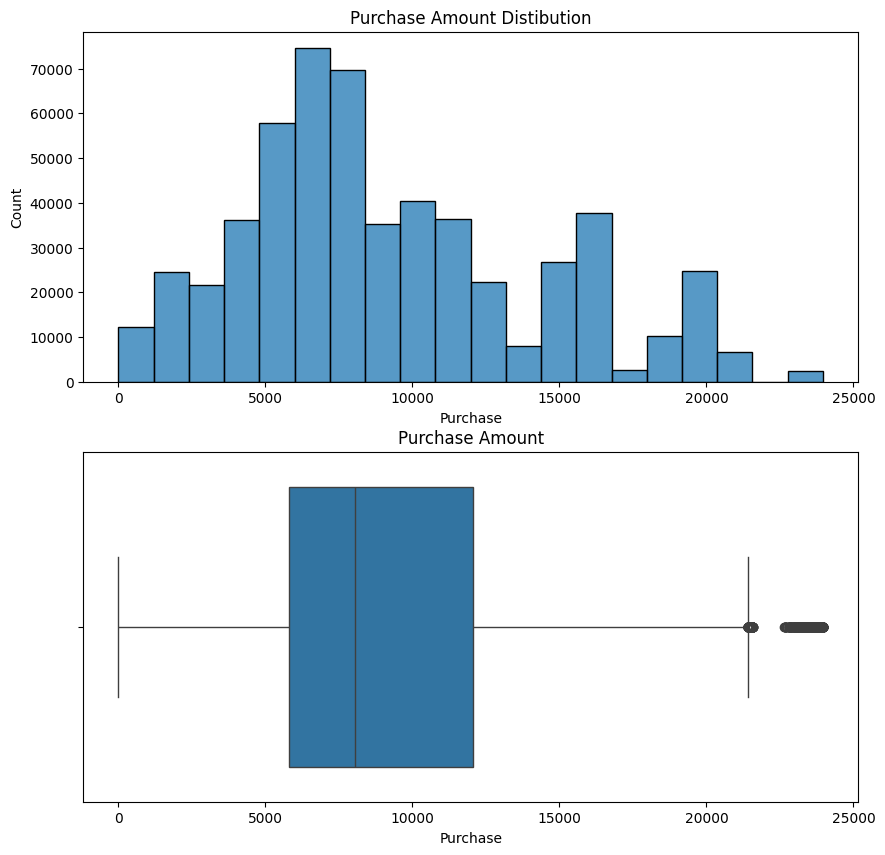

In [ ]:
fig=plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.histplot(data=df,x='Purchase',bins=20)
plt.title('Purchase Amount Distibution')
plt.subplot(2,1,2)
boxplot=sns.boxplot(data=df,x='Purchase')
plt.title('Purchase Amount')
plt.show()

In [ ]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


###**Insights:**
- The data is wide is spreaded with least value 12 and 23961.with mean 9263 and median value as 8047
- There are outliers are there on the right side.

##**Categorical Variables:**

###**Gender, Marital Status, City_category Distributions**

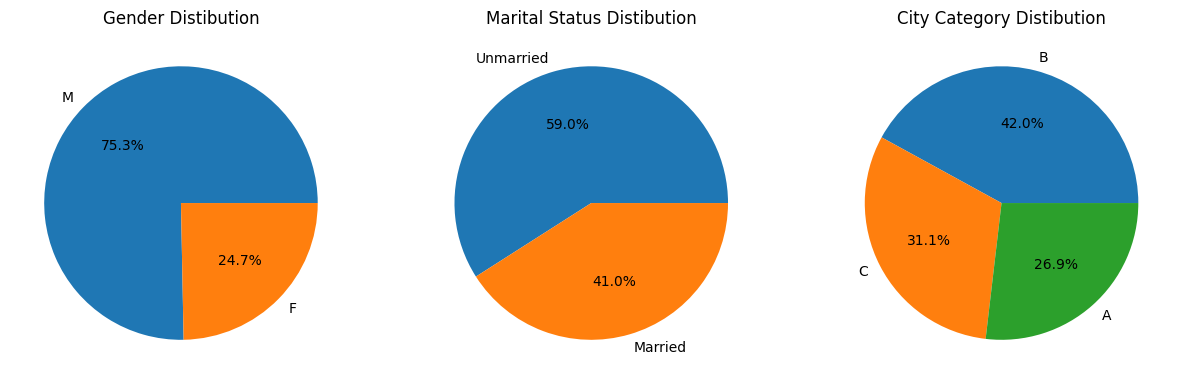

In [ ]:
fig=plt.figure(figsize=(15,12))
plt.subplot(1,3,1)
plt.pie(df['Gender'].value_counts().values,labels = df['Gender'].value_counts().index,autopct = '%.1f%%')
plt.title('Gender Distibution')
plt.subplot(1,3,2)
plt.pie(df['Marital_Status'].value_counts().values,labels = df['Marital_Status'].value_counts().index,autopct = '%.1f%%')
plt.title('Marital Status Distibution')
plt.subplot(1,3,3)
plt.pie(df['City_Category'].value_counts().values,labels = df['City_Category'].value_counts().index,autopct = '%.1f%%')
plt.title('City Category Distibution')
plt.show()

###**Insights:**

**Gender Distribution** - Data indicates a significant disparity in purchase behavior between males and females during the Black Friday event.

**Marital Status** - Given that unmarried customers account for a higher percentage of transactions, it may be worthwhile to consider specific marketing campaigns or promotions that appeal to this group.

**City Category** -  City B saw the most number of transactions followed by City C and City A respectively

###**Customer Age Distributions**

Text(0.5, 1.0, 'Customer Age Distribution')

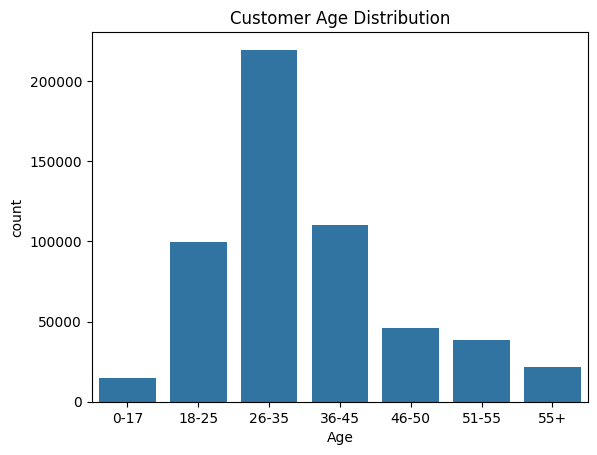

In [ ]:
#fig=plt.figure(figsize=(12,10))
sns.countplot(data=df,x='Age')
plt.title('Customer Age Distribution')

In [ ]:
age= df['Age'].value_counts()
age=pd.DataFrame(age)
age['Percentage']=round(age['count']/len(df['Age'])*100)
age

,count,Percentage
Age,,
26-35,219587,40.0
36-45,110013,20.0
18-25,99660,18.0
46-50,45701,8.0
51-55,38501,7.0
55+,21504,4.0
0-17,15102,3.0


###**Insights**

- The age group of `26-35` represents the largest share of Walmart's Black Friday sales, accounting for `40%` of the sales. This suggests that the young and middle-aged adults are the `most active and interested` in shopping for `deals and discounts`.


- The `36-45` and `18-25` age groups are the `second` and `third` largest segments, respectively, with 20% and 18% of the sales. This indicates that Walmart has a `diverse customer base` that covers different life stages and preferences..


- The `46-50, 51-55, 55+, and 0-17` age groups are the `smallest customer segments`, with less than `10%` of the total sales each. This implies that Walmart may need to improve its marketing strategies and product offerings to attract more customers from these age groups, especially the seniors and the children.

###**Customer Stay In current City Distribution**

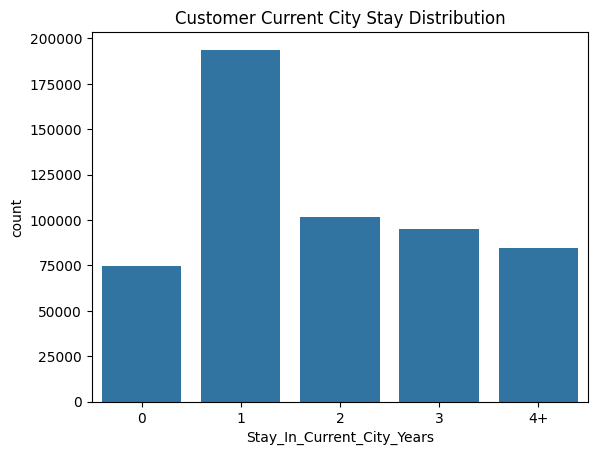

In [ ]:
#fig=plt.figure(figsize=(12,10))
sns.countplot(data=df,x='Stay_In_Current_City_Years')
plt.title('Customer Current City Stay Distribution')
plt.show()

In [ ]:
stay= df['Stay_In_Current_City_Years'].value_counts()
stay=pd.DataFrame(stay)
stay['Percentage']=round(stay['count']/len(df['Stay_In_Current_City_Years'])*100)
stay

,count,Percentage
Stay_In_Current_City_Years,,
1,193821,35.0
2,101838,19.0
3,95285,17.0
4+,84726,15.0
0,74398,14.0


###**Insights:**

- The data suggests that the customers are either new to the city or move frequently, and may have different preferences and needs than long-term residents.


- The majority of the customers `(49%)` have stayed in the current city for `one year or less`. This suggests that Walmart has a strong appeal to newcomers who may be looking for affordable and convenient shopping options.


- `4+ years` category `(14%)` customers indicates that Walmart has a `loyal customer base` who have been living in the same city for a long time.


- The percentage of customers `decreases` as the stay in the current city `increases` which suggests that Walmart may benefit from targeting long-term residents for `loyalty programs and promotions`.

Text(0.5, 1.0, 'Customers occupataion Distribution')

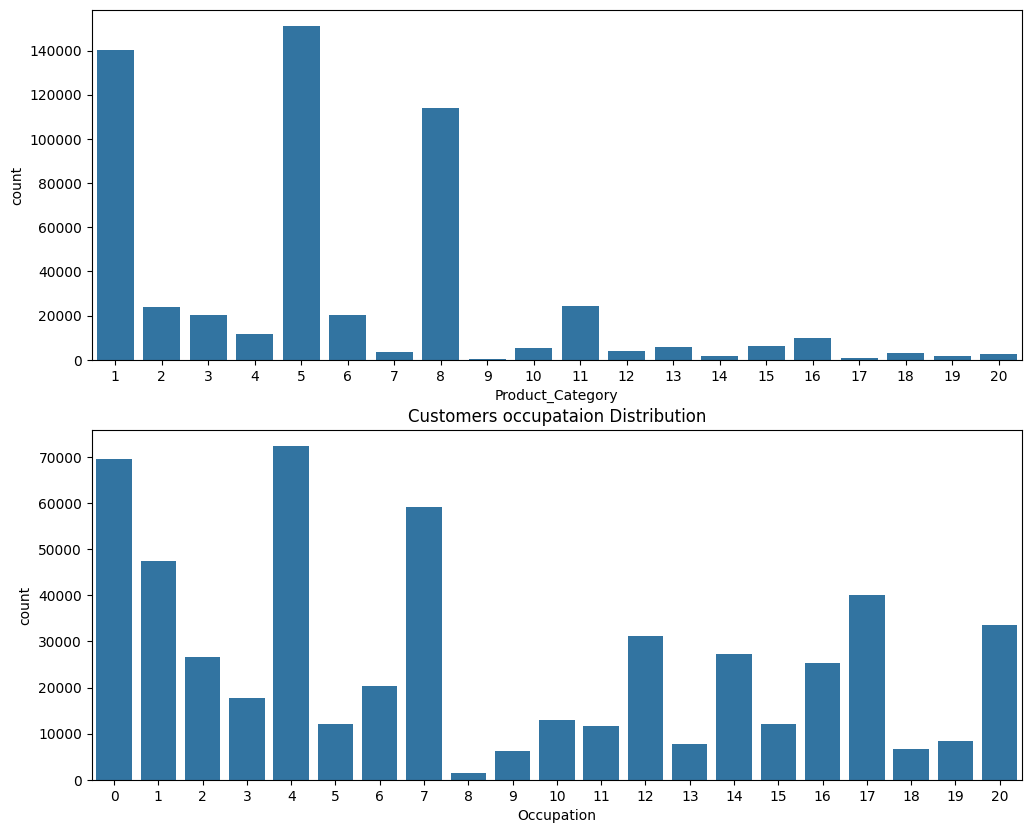

In [ ]:
fig,axs=plt.subplots(2,1,figsize=(12,10))
sns.countplot(data=df,x='Product_Category',ax=axs[0])
plt.title('Product category sales Distribution')
sns.countplot(data=df,x='Occupation',ax=axs[1])
plt.title('Customers occupataion Distribution')

###**Insights:**
- There are 20 different types of Occupation and Product_Category
- Product_Category - 1, 5, 8, & 11 have highest purchasing frequency.
- Occupation - customers with occupations 4,0,7 & 1 are high in number.

##**Bivariate Analysis:**

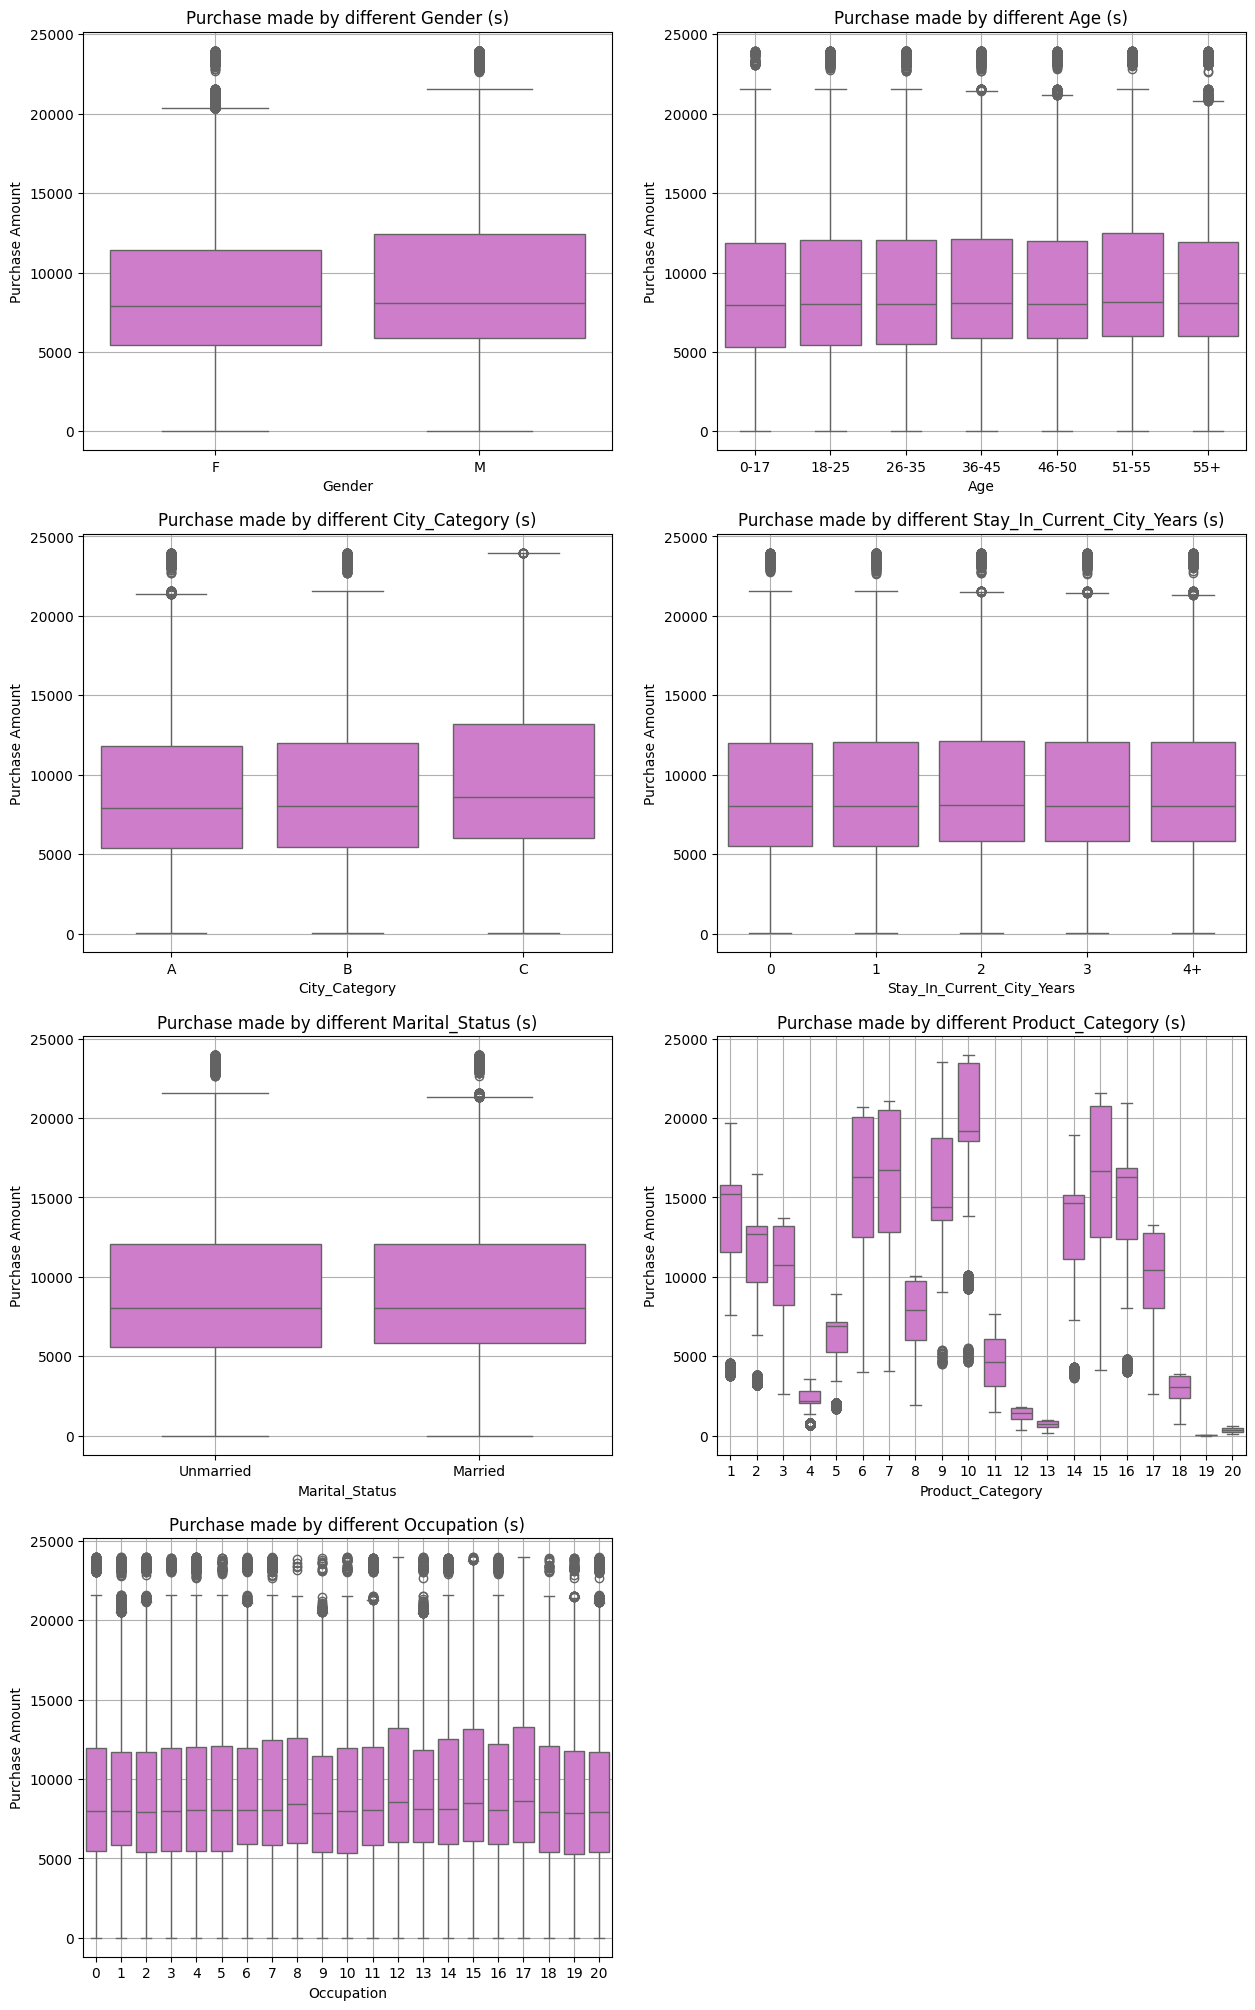

In [ ]:
# Creating bi-variate boxplots (purchase vs categorical-variable)
plt.figure(figsize = (15,25))
temp = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years','Marital_Status', 'Product_Category','Occupation']
for i in range(len(temp)):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x = df[temp[i]], y = df['Purchase'], color = 'orchid')
    plt.title('Purchase made by different {temp_i} (s)'.format(temp_i = temp[i]))
    plt.ylabel('Purchase Amount')
    plt.grid()
plt.show()

###**Insights:**
- Median purchase amounts of males and females are similar.
- Median purchase amounts of all age groups are similar.
- Median purchase amount of city of category C is slightly higher than other city categories.
- Median purchase amounts of product category 10 is highest, category 19 is lowest.
- Median purchase amount of occupations 12 and 17 are slightly higher than other occupations.
- Ads for slightly expensive products can be targeted towards people with occupation 12 and 17. (See median expenses of all occupations below)

In [ ]:
df_copy['Gender'].replace({'F' : 1, 'M': 0}, inplace = True)
df_copy['Age'].replace({'0-17':1, '18-25':2,'26-35':3, '36-45':4,'46-50':5,'51-55':6,'55+':7 }, inplace=True)
df_copy['City_Category'].replace({'A':1, 'B':2, 'C':3}, inplace=True)

In [ ]:
df_copy=df_copy.drop('Product_ID',axis=1)
df_copy=df_copy.drop('Stay_In_Current_City_Years',axis=1)

In [ ]:
#Finding pearson correlation between all the numerical features
df_copy.corr().round(2)

,User_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category,Purchase
User_ID,1.00,0.03,0.03,-0.02,0.02,0.02,0.00,0.00
Gender,0.03,1.00,0.00,-0.12,0.00,0.01,0.05,-0.06
Age,0.03,0.00,1.00,0.09,0.12,0.31,0.06,0.02
Occupation,-0.02,-0.12,0.09,1.00,0.03,0.02,-0.01,0.02
City_Category,0.02,0.00,0.12,0.03,1.00,0.04,-0.01,0.06
Marital_Status,0.02,0.01,0.31,0.02,0.04,1.00,0.02,-0.00
Product_Category,0.00,0.05,0.06,-0.01,-0.01,0.02,1.00,-0.34
Purchase,0.00,-0.06,0.02,0.02,0.06,-0.00,-0.34,1.00


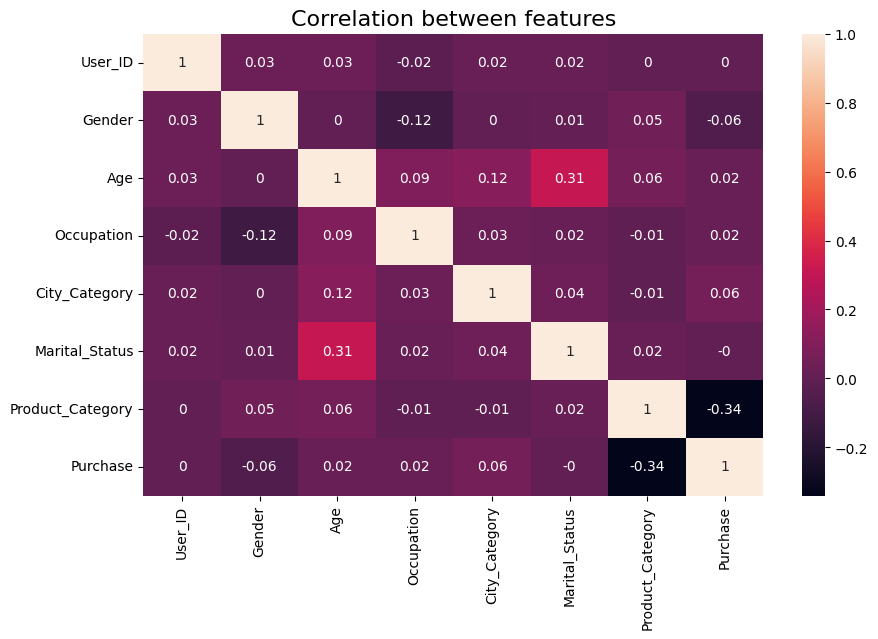

In [ ]:
# Plotting heatmap for the correlation values calculated above
plt.figure(figsize = (10,6))
sns.heatmap(df_copy.corr().round(2), annot = True)
plt.title('Correlation between features', fontsize = 16)
plt.show()

###**Insights:**
- We don’t see a strong correlation of purchase with any feature.
- There’s a weak negative correlation between product category and purchase amount.
- Weak positive correlation between age and marital status.

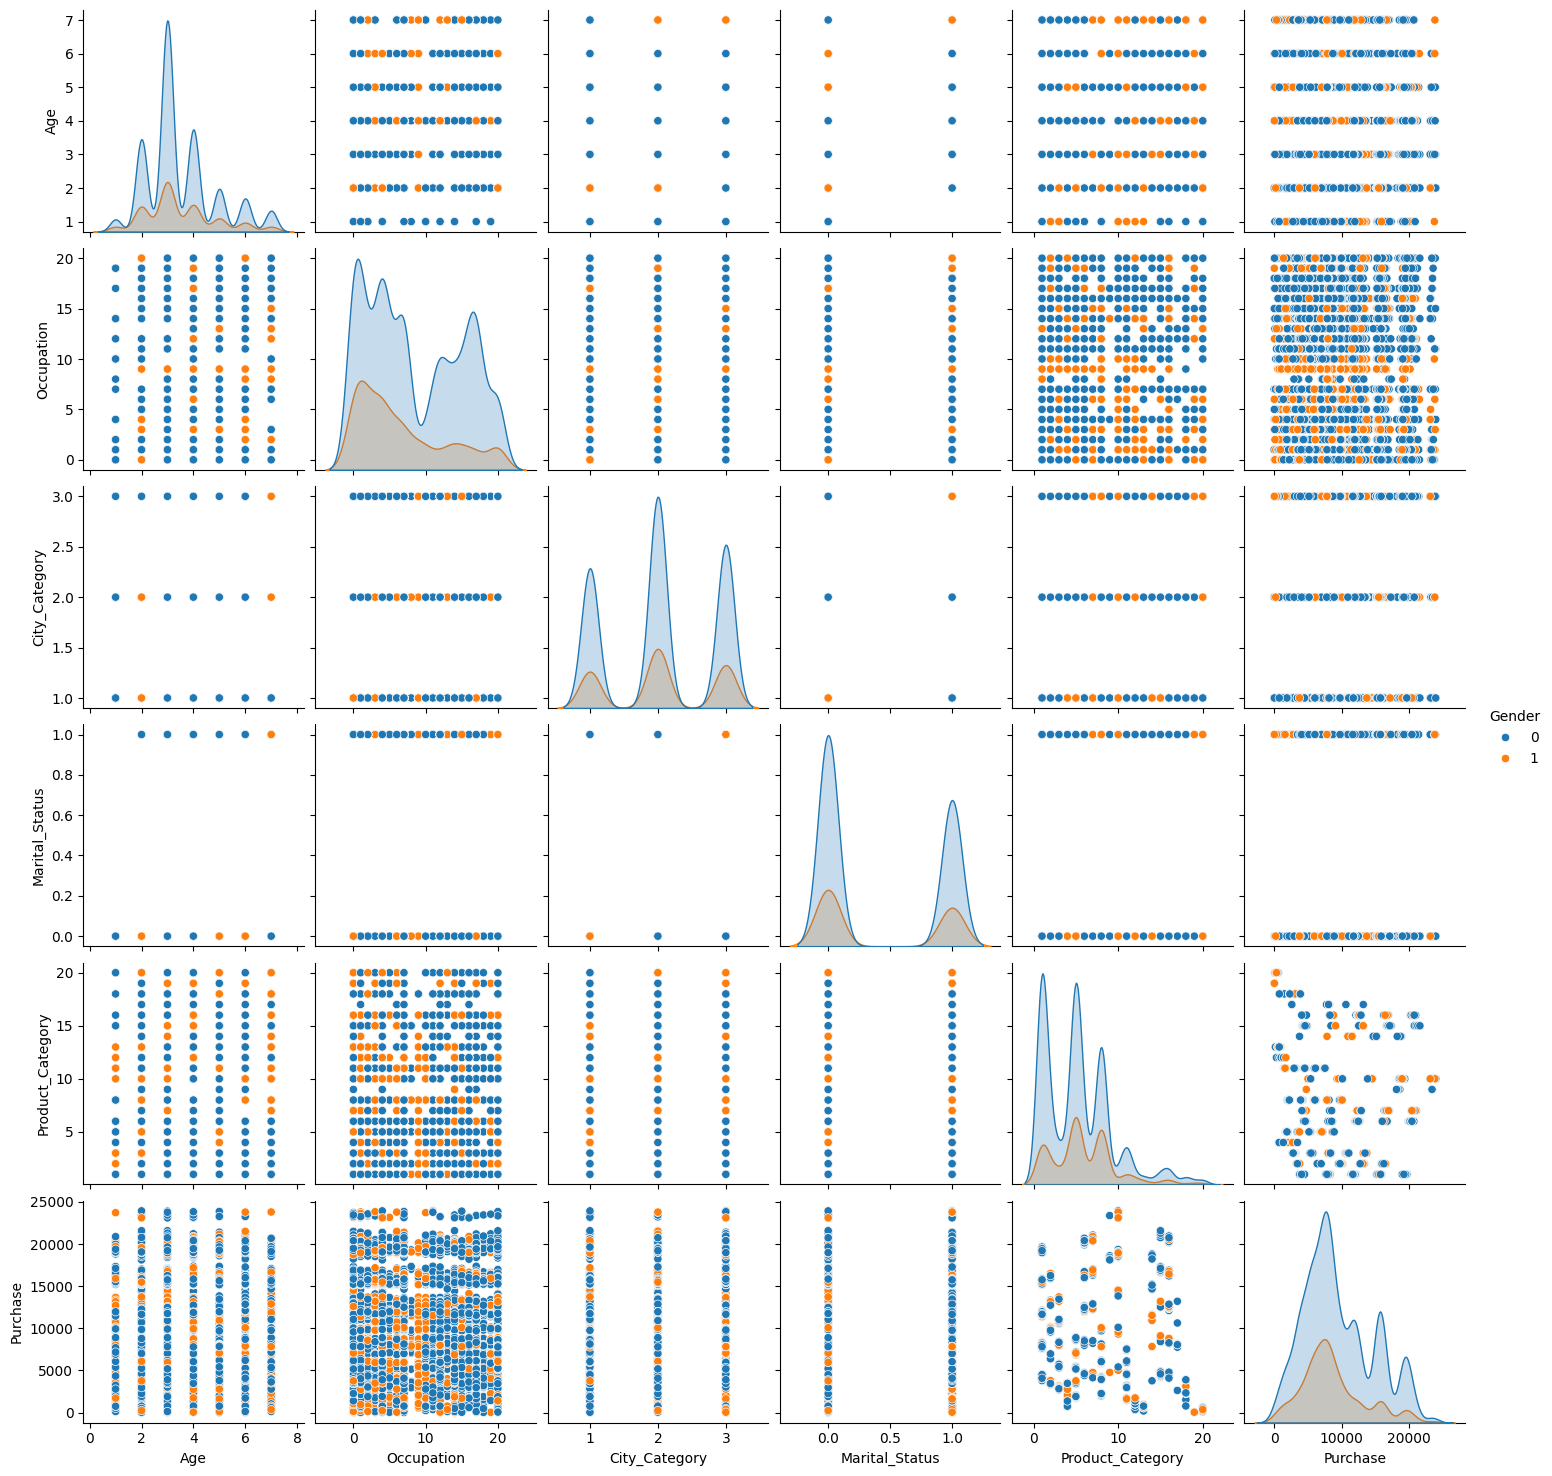

In [ ]:
# Taking a sample of 10000 entries to create pair wise plots
# Blue color dots are male. Orange are female.
sns.pairplot(df_copy.sample(10000).iloc[:,1:], hue = 'Gender', diag_kind = 'kde')
plt.show()


###**Insights:**
- Both males and females of city category B make more purchases compared to city categories A and C.
- Females purchase products of category 4, 11, 15, 17 and 18 less often.
- Most popular product category among males is 1.
- Most popular product category among females is 5. It is popular among male customers as well.
- Females with occupation 0–10 made more purchases than females with occupations 11–20.

##**Gender VS Purchase Amount:**

In [ ]:
#creating a df for purchase amount vs gender
temp = df.groupby('Gender')['Purchase'].agg(['sum','count']).reset_index()

#calculating the amount in billions
temp['sum_in_billions'] = round(temp['sum'] / 10**9,2)

#calculationg percentage distribution of purchase amount
temp['%sum'] = round(temp['sum']/temp['sum'].sum(),3)

#calculationg per purchase amount
temp['per_purchase'] = round(temp['sum']/temp['count'])

#renaming the gender
temp['Gender'] = temp['Gender'].replace({'F':'Female','M':'Male'})

temp

,Gender,sum,count,sum_in_billions,%sum,per_purchase
0,Female,1186232642,135809,1.19,0.233,8735.0
1,Male,3909580100,414259,3.91,0.767,9438.0


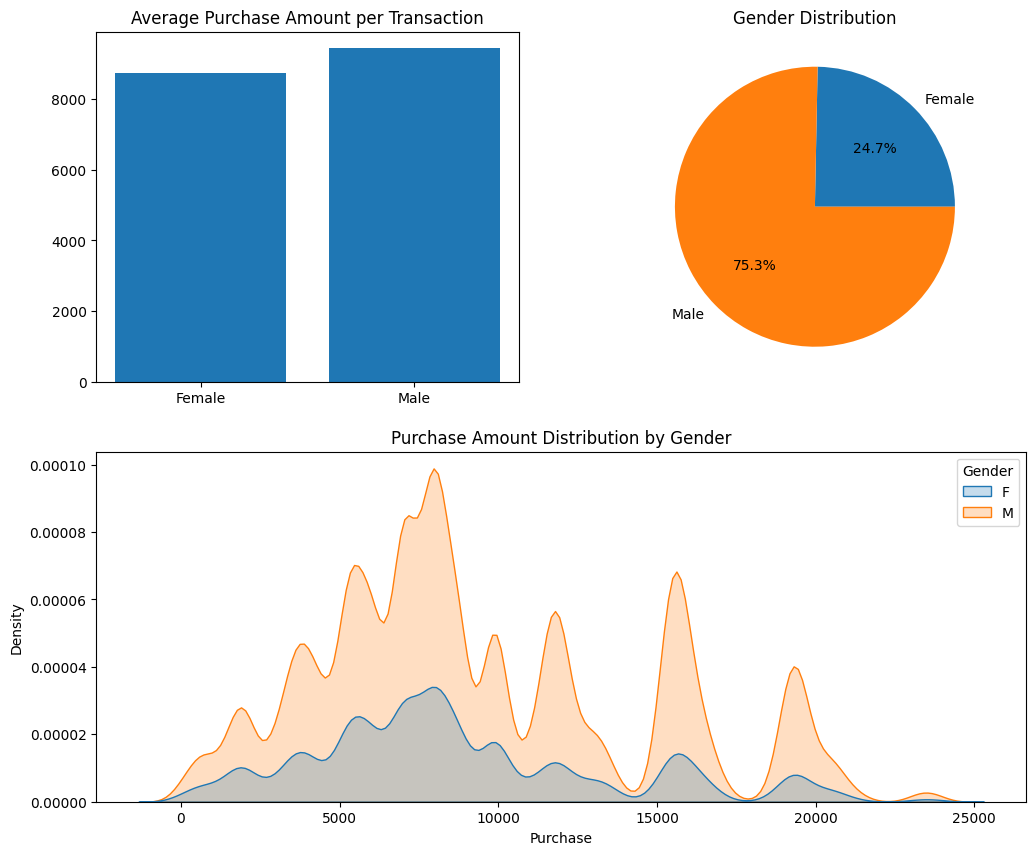

In [ ]:
fig=plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.bar(temp['Gender'],temp['per_purchase'])
plt.title('Average Purchase Amount per Transaction')
plt.subplot(2,2,2)
plt.pie(temp['count'],labels =temp['Gender'],autopct = '%.1f%%')
plt.title('Gender Distribution')
plt.subplot(2,1,2)
sns.kdeplot(data = df, x = 'Purchase', hue = 'Gender',fill=True)
plt.title('Purchase Amount Distribution by Gender')
plt.show()

In [ ]:
#creating a function to calculate confidence interval

def confidence_interval(data,ci):
    #converting the list to series
    l_ci = (100-ci)/2
    u_ci = (100+ci)/2

    #calculating lower limit and upper limit of confidence interval
    interval = np.percentile(data,[l_ci,u_ci]).round(0)

    return interval

In [ ]:
#defining a function for plotting the visual for given confidence interval

def plot(ci):
  #setting the plot style
  fig = plt.figure(figsize = (15,10))
  gs = fig.add_gridspec(2,2)
  sample_sizes = [(100,0,0),(1000,0,1),(5000,1,0),(50000,1,1)]
  df_male = df.loc[df['Gender'] == 'M','Purchase']
  df_female = df.loc[df['Gender'] == 'F','Purchase']
  male_samples = {}
  female_samples = {}

  for i,x,y in sample_sizes:
        male_means = []
        female_means = []
        for j in range(2000):
          #creating random samples of i sample size
          male_bootstrapped_samples = np.random.choice(df_male,size = i)
          female_bootstrapped_samples = np.random.choice(df_female,size = i)

          #calculating mean of those samples
          male_sample_mean = np.mean(male_bootstrapped_samples)
          female_sample_mean = np.mean(female_bootstrapped_samples)

          #appending the mean to the list
          male_means.append(male_sample_mean)
          female_means.append(female_sample_mean)
        #storing the above sample generated
        male_samples[f'{ci}%_{i}'] = male_means
        female_samples[f'{ci}%_{i}'] = female_means

        #creating a temporary dataframe for creating kdeplot
        temp_df = pd.DataFrame(data = {'male_means':male_means,'female_means':female_means})

                                                        #plotting kdeplots
        #plot position
        ax = fig.add_subplot(gs[x,y])

        #plots for male and female
        sns.kdeplot(data = temp_df,x = 'male_means' ,fill = True,ax = ax,label = 'Male')
        sns.kdeplot(data = temp_df,x = 'female_means' ,fill = True,ax = ax,label = 'Female')

        #calculating confidence intervals for given confidence level(ci)
        m_range = confidence_interval(male_means,ci)
        f_range = confidence_interval(female_means,ci)
        #setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})

        plt.legend()

    #setting title for visual
  fig.suptitle(f'{ci}% Confidence Interval',font = 'serif', size = 18, weight = 'bold')
  plt.show()

  return male_samples,female_samples


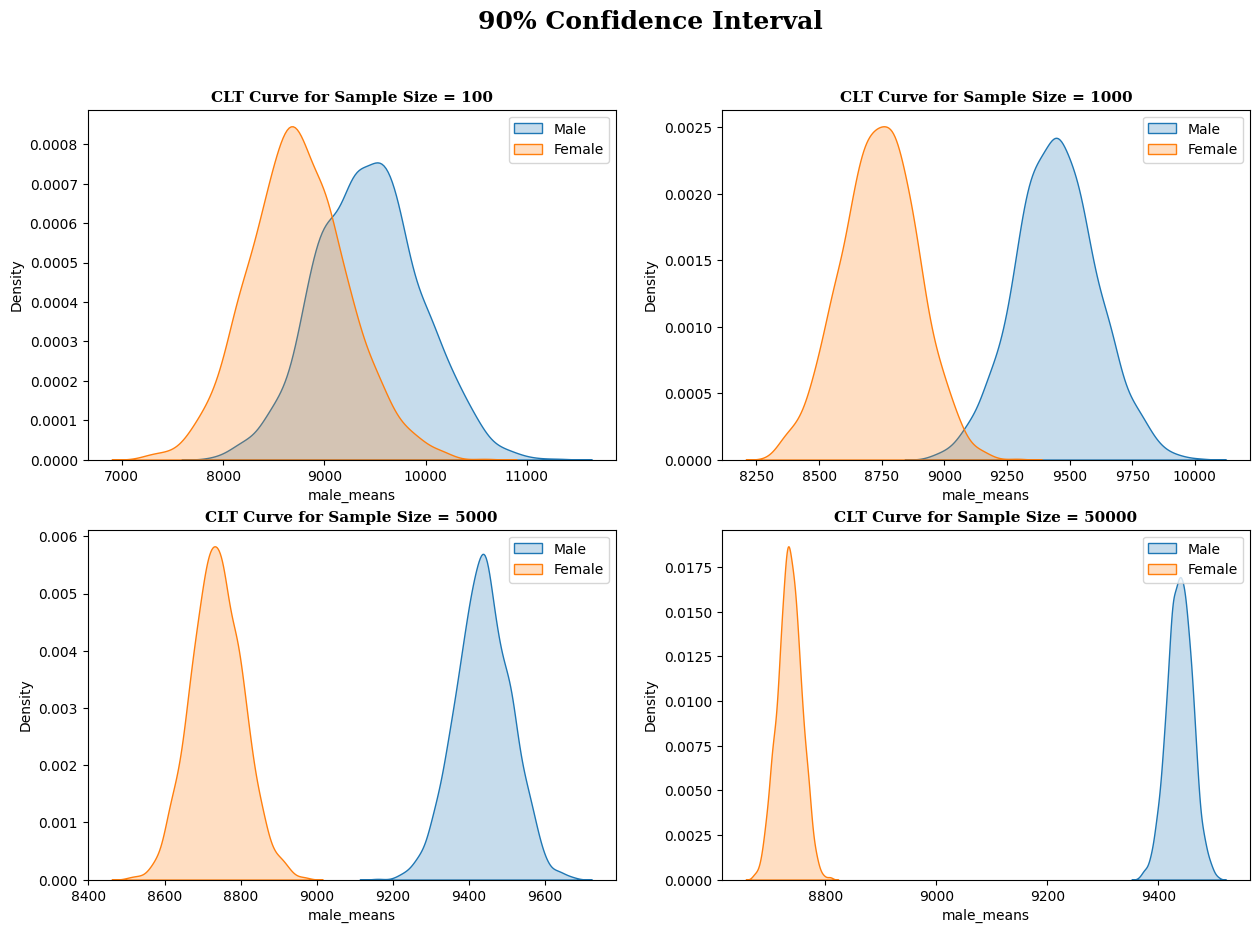

In [ ]:
m_samp_90,f_samp_90 = plot(90)

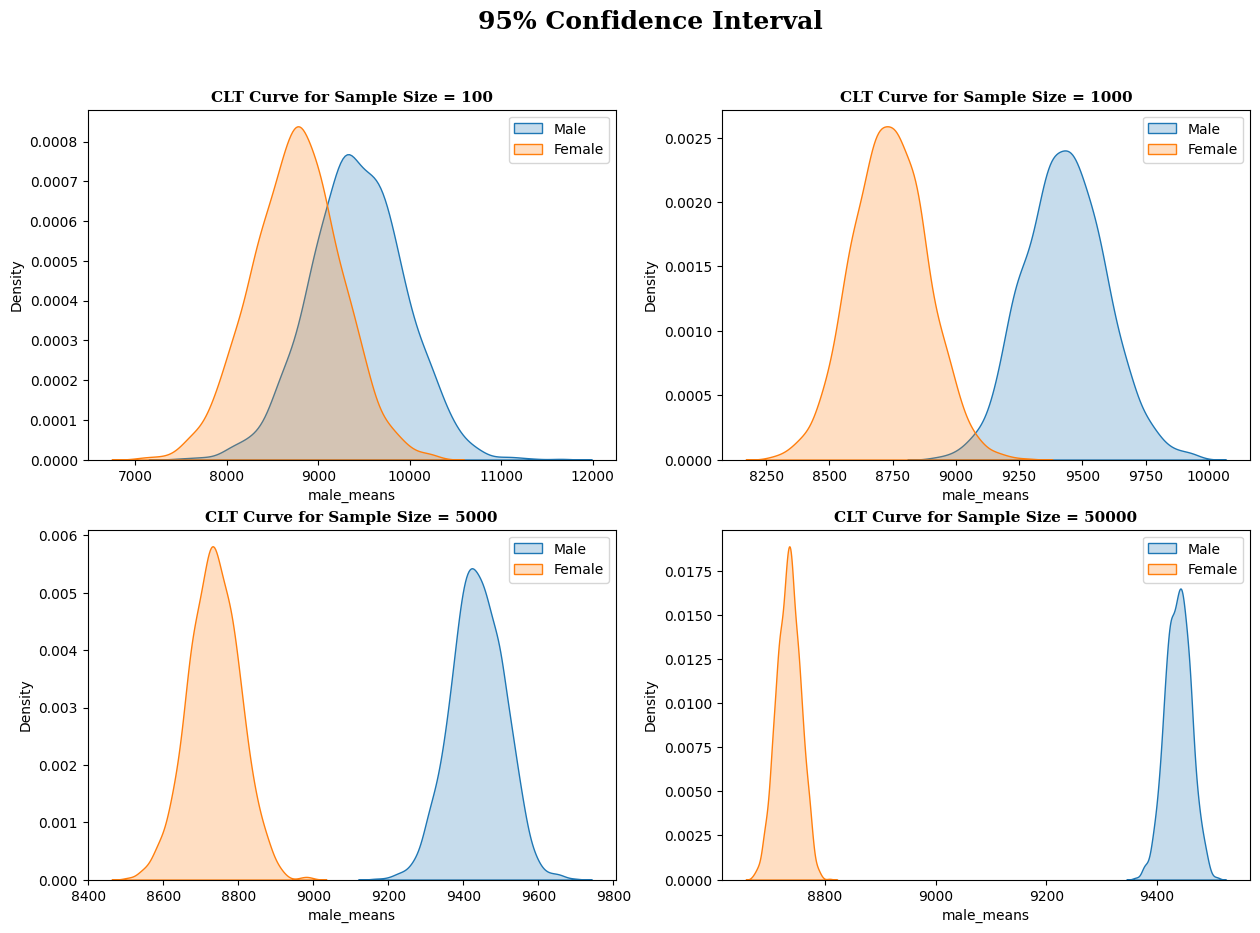

In [ ]:
m_samp_95,f_samp_95 = plot(95)

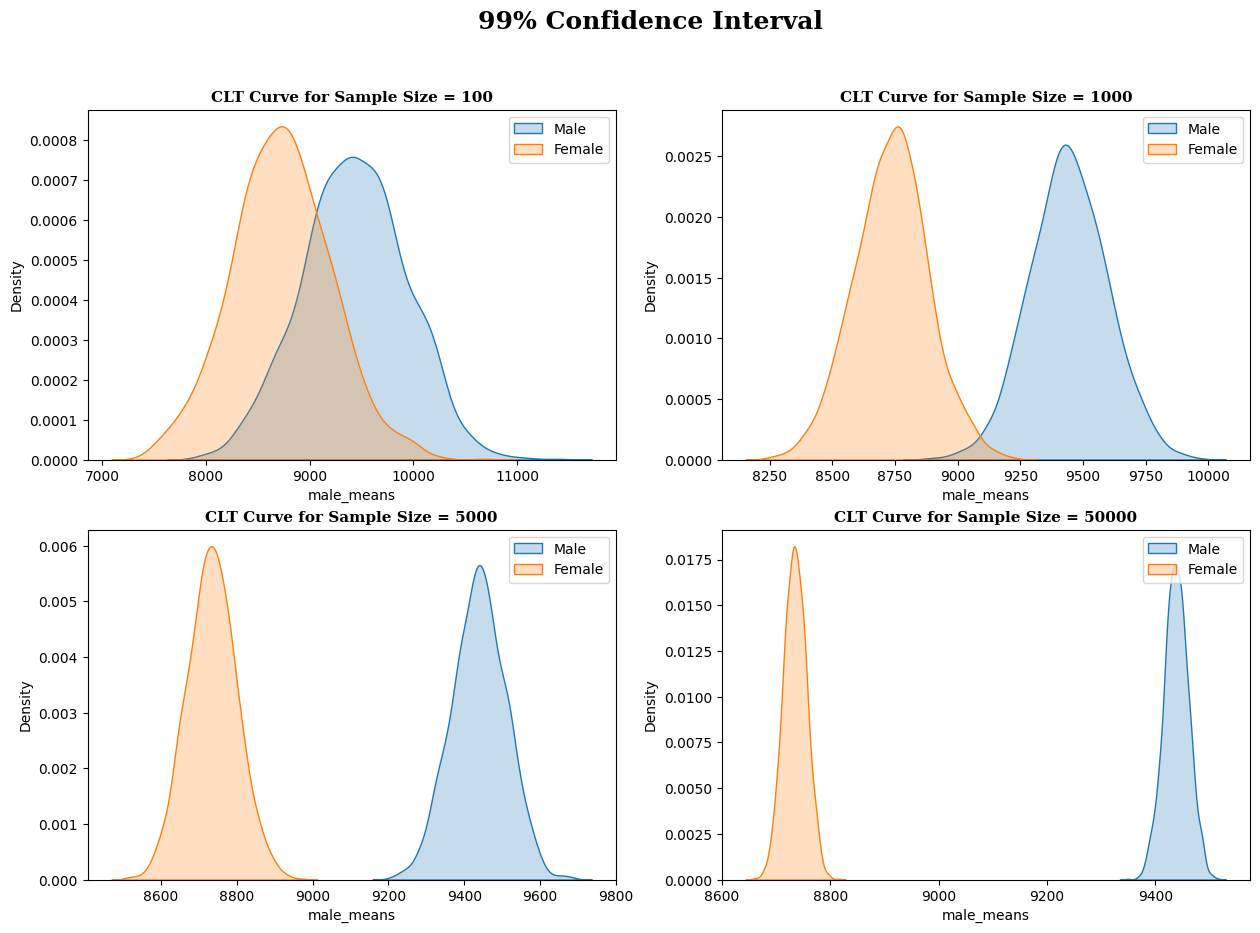

In [ ]:
m_samp_99,f_samp_99 = plot(99)

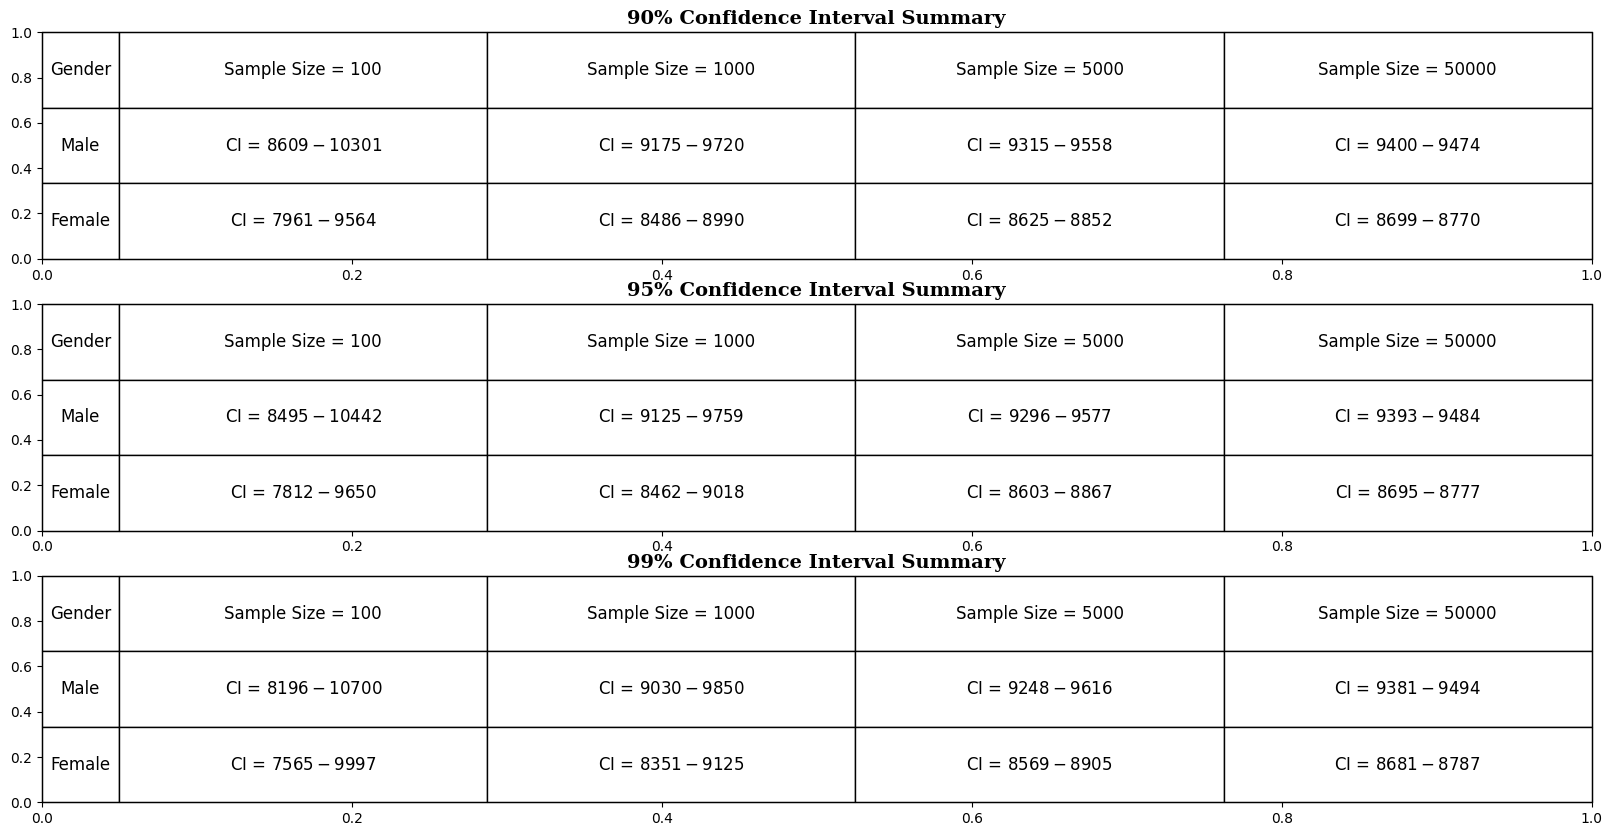

In [ ]:
fig = plt.figure(figsize = (20,10))
gs = fig.add_gridspec(3,1)

for i,j,k,l in [(m_samp_90,f_samp_90,90,0),(m_samp_95,f_samp_95,95,1),(m_samp_99,f_samp_99,99,2)]:
    #list for collecting ci for given cl
    m_ci = ['Male']
    f_ci = ['Female']

    #finding ci for each sample size (males)
    for m in i:
        m_range = confidence_interval(i[m],k)
        m_ci.append(f"CI = ${m_range[0]:.0f} - ${m_range[1]:.0f}")

    #finding ci for each sample size (females)
    for f in j:
        f_range = confidence_interval(j[f],k)
        f_ci.append(f"CI = ${f_range[0]:.0f} - ${f_range[1]:.0f}")


    ax = fig.add_subplot(gs[l])

    #contents of the table
    ci_info = [m_ci,f_ci]

    #plotting the table
    table = ax.table(cellText = ci_info, cellLoc='center',
                     colLabels =['Gender','Sample Size = 100','Sample Size = 1000','Sample Size = 5000','Sample Size = 50000'],
                     colLoc = 'center',colWidths = [0.05,0.2375,0.2375,0.2375,0.2375],bbox =[0, 0, 1, 1])

    table.set_fontsize(13)



    #setting title
    ax.set_title(f"{k}% Confidence Interval Summary",{'font':'serif', 'size':14,'weight':'bold'})

###**Insights:**
- We are `95% confident` that the true population average for `males` falls between `$9,393 and $9,483`, and for `females`, it falls between `$8,692 and $8,777`.
- 95% confidence interval for purchase amounts of females is less than males without any intersection.
- We can say with 95% confidence that females spend less than males.
- Ads for products which cost between 9151 and 9790 can be targetted towards males.
- Ads for products which cost between 8507 and 9051 can be targetted towards females.

##**Customer Marital status VS Purchase Amount**

In [ ]:
#creating a df for purchase amount vs marital status
temp = df.groupby('Marital_Status')['Purchase'].agg(['sum','count']).reset_index()

#calculating the amount in billions
temp['sum_in_billions'] = round(temp['sum'] / 10**9,2)

#calculationg percentage distribution of purchase amount
temp['%sum'] = round(temp['sum']/temp['sum'].sum(),3)

#calculationg per purchase amount
temp['per_purchase'] = round(temp['sum']/temp['count'])

temp

,Marital_Status,sum,count,sum_in_billions,%sum,per_purchase
0,0,3008927447,324731,3.01,0.59,9266.0
1,1,2086885295,225337,2.09,0.41,9261.0


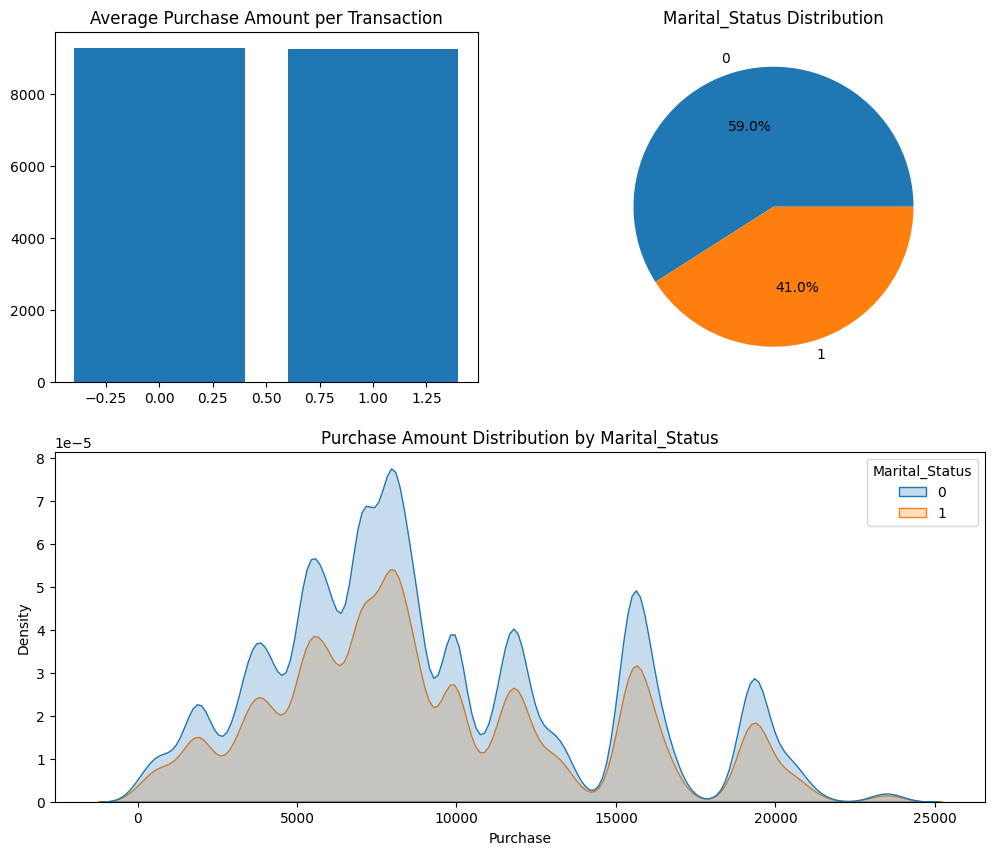

In [ ]:
fig=plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.bar(temp['Marital_Status'],temp['per_purchase'])
plt.title('Average Purchase Amount per Transaction')
plt.subplot(2,2,2)
plt.pie(temp['count'],labels =temp['Marital_Status'],autopct = '%.1f%%')
plt.title('Marital_Status Distribution')
plt.subplot(2,1,2)
sns.kdeplot(data = df, x = 'Purchase', hue = 'Marital_Status',fill=True)
plt.title('Purchase Amount Distribution by Marital_Status')
plt.show()

###**Insights:**
- The total purchase amount and number of transactions by Unmarried customers was more than 20% the amount and transactions by married customers
- The average purchase amount per transaction was almost similar for married and unmarried customers ($9261 vs $9266)
- As seen above, the purchase amount for both married and unmarried customers is not normally distributed.

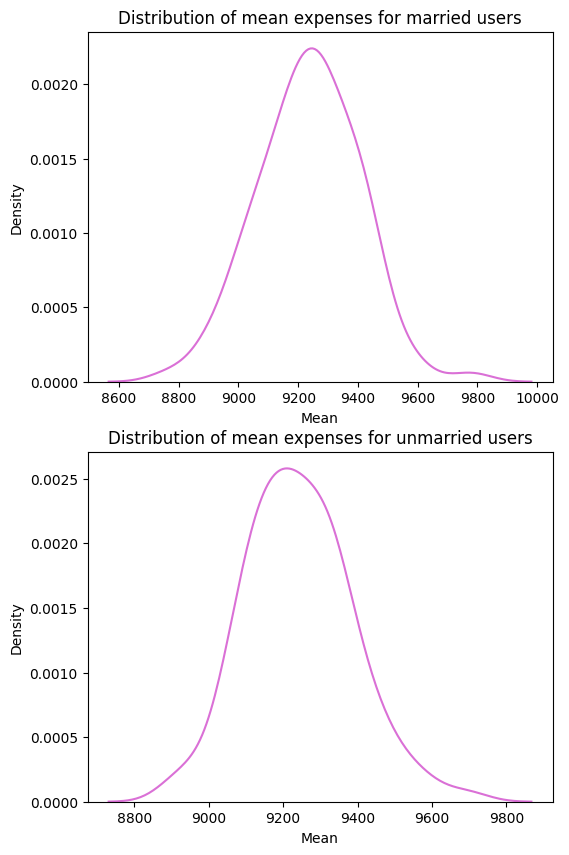

In [ ]:
# Taking samples of 1000 entries for married and unmarried people and
# Creating kde plots
plt.figure(figsize=(6,10))
x = 1
for j in [1,0]:
    means = []
    for i in range(100):
        temp = df.loc[df['Marital_Status']==j,'Purchase'].sample(1000)
        avg = temp.mean()
        means.append(avg)
    plt.subplot(2,1,x)
    sns.kdeplot(x = means, color = 'orchid')
    if j == 0:
        ms = 'unmarried'
        means_mr = means
    else:
        ms = 'married'
        means_umr = means
    plt.title('Distribution of mean expenses for {m} users'.format(m = ms), fontsize = 12)
    plt.xlabel('Mean')
    x += 1
plt.show()

In [ ]:
# Finding different confidence intervals for mean expense by married and unmarried customers
for i in ['married', 'unmarried']:
    print('For {m}-'.format(m = i))
    if i == 'married':
        means = means_mr
        ms = 1
    else:
        means = means_umr
        ms = 0
    print('Mean of sample means =',np.mean(means))
    print('Population mean =', np.mean(df.loc[df['Marital_Status']==ms, 'Purchase']))
    print('Standard deviation of means (Standard Error) =', np.std(means))
    print('Standard deviation of population =',df.loc[df['Marital_Status']==ms, 'Purchase'].std() )
    print('99% CONFIDENCE INTERVAL for mean expense by {m} users-'.format(m = i))
    print((np.percentile(means, 0.5).round(2), np.percentile(means, 99.5).round(2)))
    print('95% CONFIDENCE INTERVAL for mean expense by {m} users-'.format(m = i))
    print((np.percentile(means, 2.5).round(2), np.percentile(means, 97.5).round(2)))
    print('90% CONFIDENCE INTERVAL for mean expense by {m} users-'.format(m = i))
    print((np.percentile(means, 5).round(2), np.percentile(means, 95).round(2)))
    print('-'*50)

For married-
Mean of sample means = 9242.161479999999
Population mean = 9261.174574082374
Standard deviation of means (Standard Error) = 143.08078880461065
Standard deviation of population = 5016.897377793055
99% CONFIDENCE INTERVAL for mean expense by married users-
(8920.42, 9646.56)
95% CONFIDENCE INTERVAL for mean expense by married users-
(8980.45, 9544.15)
90% CONFIDENCE INTERVAL for mean expense by married users-
(9034.25, 9472.62)
--------------------------------------------------
For unmarried-
Mean of sample means = 9235.81653
Population mean = 9265.907618921507
Standard deviation of means (Standard Error) = 169.26993068040494
Standard deviation of population = 5027.347858674449
99% CONFIDENCE INTERVAL for mean expense by unmarried users-
(8823.62, 9685.0)
95% CONFIDENCE INTERVAL for mean expense by unmarried users-
(8899.81, 9540.99)
90% CONFIDENCE INTERVAL for mean expense by unmarried users-
(8957.92, 9481.41)
--------------------------------------------------


###**Insights:**
- Mean expense by married customers is 9261.17
- Mean expense by unmarried customers is 9265.90
- There’s is overlap between 90%, 95% and 99% confidence intervals for both.
- We don’t have enough statistical evidence to compare their expenses.

##**Customer Age VS Purchase Amount:**

In [ ]:
#creating a df for purchase amount vs age group
temp = df.groupby('Age')['Purchase'].agg(['sum','count']).reset_index()

#calculating the amount in billions
temp['sum_in_billions'] = round(temp['sum'] / 10**9,2)

#calculationg percentage distribution of purchase amount
temp['%sum'] = round(temp['sum']/temp['sum'].sum(),3)

#calculationg per purchase amount
temp['per_purchase'] = round(temp['sum']/temp['count'])

temp

,Age,sum,count,sum_in_billions,%sum,per_purchase
0,0-17,134913183,15102,0.13,0.026,8933.0
1,18-25,913848675,99660,0.91,0.179,9170.0
2,26-35,2031770578,219587,2.03,0.399,9253.0
3,36-45,1026569884,110013,1.03,0.201,9331.0
4,46-50,420843403,45701,0.42,0.083,9209.0
5,51-55,367099644,38501,0.37,0.072,9535.0
6,55+,200767375,21504,0.20,0.039,9336.0


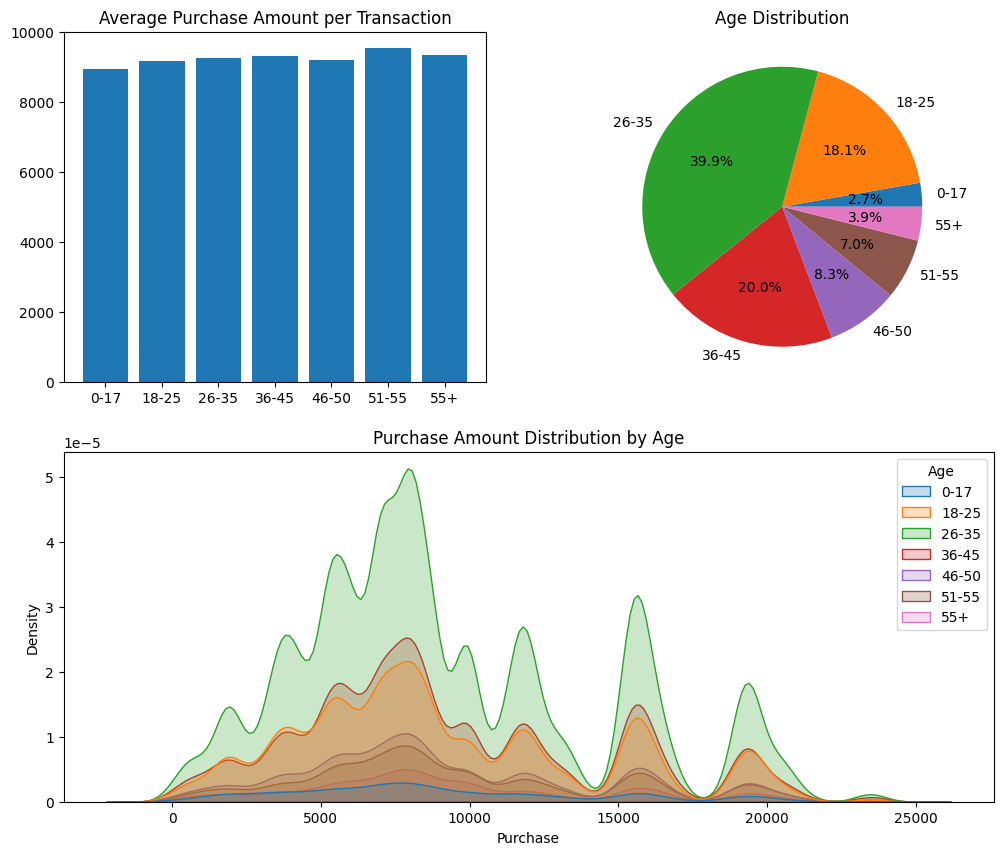

In [ ]:
fig=plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.bar(temp['Age'],temp['per_purchase'])
plt.title('Average Purchase Amount per Transaction')
plt.subplot(2,2,2)
plt.pie(temp['count'],labels =temp['Age'],autopct = '%.1f%%')
plt.title('Age Distribution')
plt.subplot(2,1,2)
sns.kdeplot(data = df, x = 'Purchase', hue = 'Age',fill=True)
plt.title('Purchase Amount Distribution by Age')
plt.show()

###**Insights:**
- Age group between 26 - 45 accounts to almost 60% of the total sales suggesting that Walmart's Black Friday sales are most popular among these age groups.

- The age group 0-17 has the lowest sales percentage (2.6%), which is expected as they may not have as much purchasing power. Understanding their preferences and providing special offers could be beneficial, especially considering the potential for building customer loyalty as they age.
- While there is not a significant difference in per purchase spending among the age groups, the 51-55 age group has a relatively low sales percentage (7.2%)but they have the highest per purchase spending at 9535. Walmart could consider strategies to attract and retain this high-spending demographic

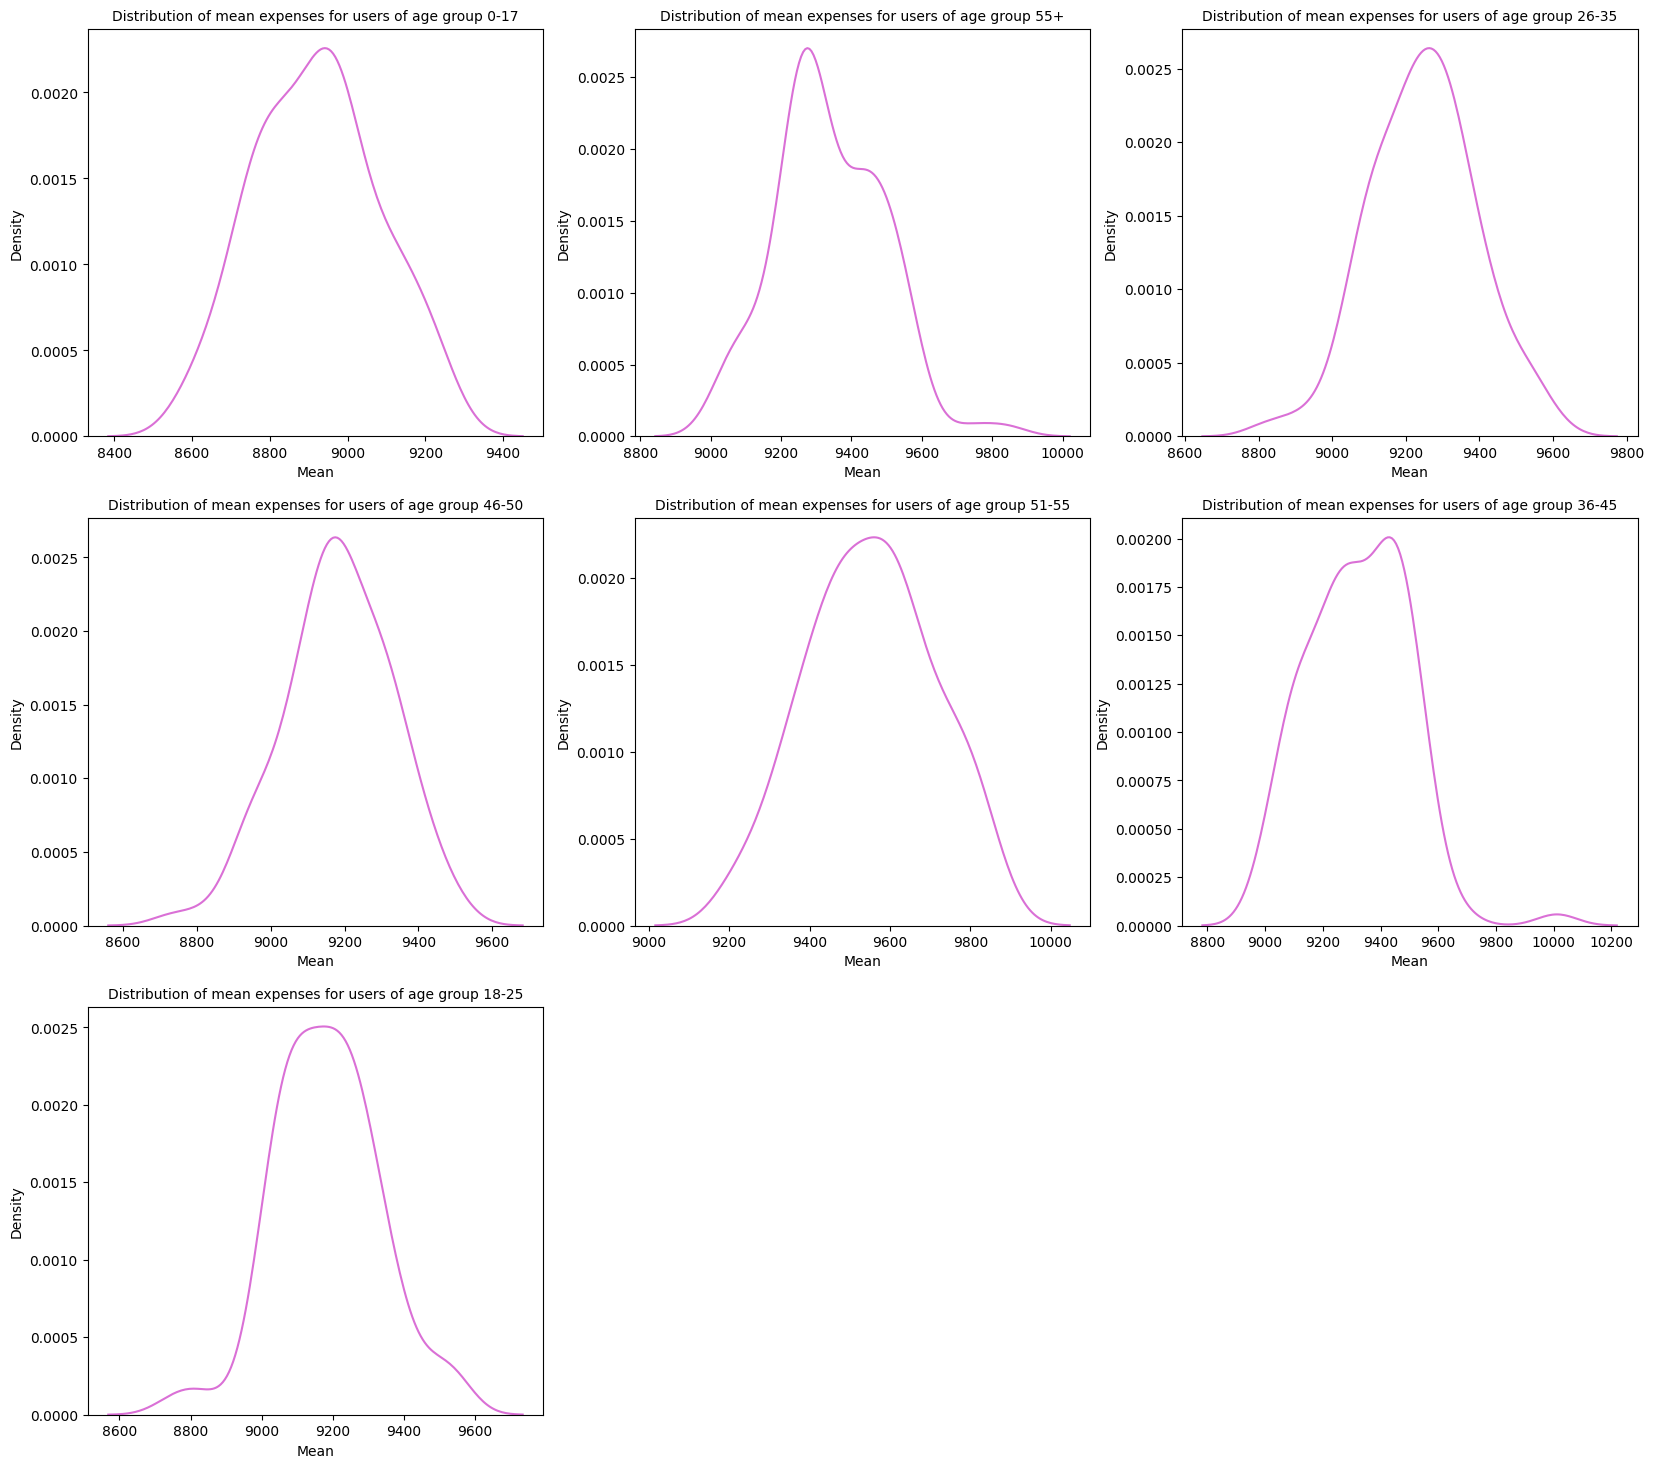

In [ ]:
# Taking 100 samples of 1000 entries for each age group and
# Plotting KDE plots
plt.figure(figsize=(20,18))
x = 1
for j in ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']:
    means = []
    for i in range(100):
        temp = df.loc[df['Age']==j,'Purchase'].sample(1000)
        avg = temp.mean()
        means.append(avg)
    plt.subplot(3,3,x)
    sns.kdeplot(x = means, color = 'orchid')
    if j == '0-17':
        means_0 = means
    elif j == '55+':
        means_55 = means
    elif j == '26-35':
        means_26 = means
    elif j == '46-50':
        means_46 = means
    elif j == '51-55':
        means_51 = means
    elif j == '36-45':
        means_36 = means
    else:
        means_18 = means
    plt.title('Distribution of mean expenses for users of age group {a}'.format(a = j), fontsize=10)
    plt.xlabel('Mean')
    x += 1
plt.show()

In [ ]:
# Finding confidence intervals for mean purchase for each age group
for i in ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']:
    print('For {m}-'.format(m = i))
    if i == '0-17':
        means = means_0
    elif i == '55+':
        means = means_55
    elif i == '26-35':
        means = means_26
    elif i == '46-50':
        means = means_46
    elif i == '51-55':
        means = means_51
    elif i == '36-45':
        means = means_36
    else:
        means = means_18

    print('Mean of sample means =',np.mean(means))
    print('Population mean =', np.mean(df.loc[df['Age']==i, 'Purchase']))
    print('Standard deviation of means (Standard Error) =', np.std(means))
    print('Standard deviation of population =',df.loc[df['Age']==i, 'Purchase'].std() )
    print('99% CONFIDENCE INTERVAL for mean expense by users of age group {a}-'.format(a = i))
    print((np.percentile(means, 0.5).round(2), np.percentile(means, 99.5).round(2)))
    print('95% CONFIDENCE INTERVAL for mean expense by users of age group {a}-'.format(a = i))
    print((np.percentile(means, 2.5).round(2), np.percentile(means, 97.5).round(2)))
    print('90% CONFIDENCE INTERVAL for mean expense by users of age group {a}-'.format(a = i))
    print((np.percentile(means, 5).round(2), np.percentile(means, 95).round(2)))
    print('-'*50)

For 0-17-
Mean of sample means = 8921.015200000002
Population mean = 8933.464640444974
Standard deviation of means (Standard Error) = 158.63756353770688
Standard deviation of population = 5111.11404600277
99% CONFIDENCE INTERVAL for mean expense by users of age group 0-17-
(8587.3, 9250.76)
95% CONFIDENCE INTERVAL for mean expense by users of age group 0-17-
(8636.15, 9220.43)
90% CONFIDENCE INTERVAL for mean expense by users of age group 0-17-
(8664.36, 9195.57)
--------------------------------------------------
For 55+-
Mean of sample means = 9338.03516
Population mean = 9336.280459449405
Standard deviation of means (Standard Error) = 151.29186272233676
Standard deviation of population = 5011.4939956034605
99% CONFIDENCE INTERVAL for mean expense by users of age group 55+-
(9025.89, 9788.2)
95% CONFIDENCE INTERVAL for mean expense by users of age group 55+-
(9065.77, 9580.64)
90% CONFIDENCE INTERVAL for mean expense by users of age group 55+-
(9073.53, 9557.94)
----------------------

##**Recommendations**

**1.Target Male Shoppers**
- Since male customers account for a significant portion of Black Friday sales and tend to spend more per transaction on average, Walmart should tailor its marketing strategies and product offerings to incentivize higher spending among male customers while ensuring competitive pricing for female-oriented products.

**2. Focus on 26 - 45 Age Group**
-  With the age group between 26 and 45 contributing to the majority of sales, Walmart should specifically cater to the preferences and needs of this demographic.This could include offering exclusive deals on products that are popular among this age group.

**3. Engage Younger Shoppers**
- Knowing that customers in the 0 - 17 age group have the lowest spending per transaction, Walmart can try to increase their spending per transaction by offering them more attractive discounts, coupons, or rewards programs. It's essential to start building brand loyalty among younger consumers.

**4. Customer Segmentation**
- Since customers in the 18 - 25, 26 - 35, and 46 - 50 age groups exhibit similar buying characteristics, and so do the customers in 36 - 45 and 55+, Walmart can optimize its product selection to cater to the preferences of these age groups. Also, Walmart can use this information to adjust their pricing strategies for different age groups.

**5. Enhance the 51 - 55 Age Group Shopping Experience**
- Considering that customers aged 51 - 55 have the highest spending per transaction, Walmart offer them exclusive pre-sale access, special discount or provide personalized product recommendations for this age group. Walmart can also introduce loyalty programs specifically designed to reward and retain customers in the 51 - 55 age group.

**6. Post-Black Friday Engagement**
- After Black Friday, walmart should engage with customers who made purchases by sending follow-up emails or offers for related products. This can help increase customer retention and encourage repeat business throughout the holiday season and beyond.


**Action Items:**
- Ads can be targeted towards people of age group 26–35, since they are making maximum purchases. Walmart can also include new products required by people of this age group.
- Ads can be targeted towards people of city category B. Inventory in these cities can be replenished.
- Ads can be targeted towards people who have spent between 1 to 2 years in their cities.
- Ads can be targeted towards unmarried people.
Products of categories 1, 5 and 8 can be kept in inventory as well as made easily visible in the stores.
- Offers/rewards can be given on purchases above 12000 dollars to nudge customers to make more purchases.
- More products popular among people with occupations 0, 4 and 7 can be kept in store.
- Ads for slightly expensive products can be targetted towards people with occupation 12 and 17. (See median expenses of all occupations below)
- Ads for products which cost between 9151 and 9790 can be targetted towards males.
- Ads for products which cost between 8507 and 9051 can be targetted towards females.
- Ads for products which cost between 9225 to 9908 can be targetted towards 51–55 year old customers.
- Ads for products which cost between 8611 to 9235 can be targetted towards 0–17 year old customers.